<h1 style="text-align:center">
    Práctica Machine Learning
</h1>
<h2 style="text-align:center">
    Diego Fernando Cortes Avila
</h2>


### Importe del archivo airbnb-listings-extract.csv, división en archivos train y test

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


### Importe, revisión y procesado del archivo train.csv
Se realiza importación del archivo y se valida su contenido.

In [2]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')
pd.options.display.max_columns = None
print('Registros cargados:',len(df))
df.head(5)

Registros cargados: 11824


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

Se valida la cantidad de registros por **país** para dejar solo los más relevantes

In [3]:
df.groupby('Country').ID.count()

Country
Australia            38
Austria              26
Belgium              16
Canada               16
Cuba                  1
Denmark              14
France               87
Germany              33
Greece                3
Hong Kong             2
Ireland              34
Italy                61
Netherlands          19
Spain             11203
Switzerland           4
United Kingdom      127
United States       139
Name: ID, dtype: int64

In [4]:
dfSpain = df[df['Country'] == 'Spain']

Se valida la cantidad de registros por **ciudad** para dejar solo los más relevantes

In [5]:
dfSpain.groupby('City').ID.count().to_frame().sort_values('ID', ascending=False)

,ID
City,
Madrid,10567
Barcelona,235
Palma,44
马德里,43
Alcúdia,31
...,...
Port de Sóller,1
Portals Nous,1
El Toro,1


In [6]:
dfMadrid = dfSpain[dfSpain['City'] == 'Madrid']
dfMadrid.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

Se eliminan las columnas que **no aportan al análisis** de la información o que para ser usadas, **requieren un proceso más complejo** de procesamiento de texto

In [7]:
colmnas_x_borrar = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name','Summary','Space','Description', 
                    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
                    'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host About',
                    'Host Thumbnail Url', 'Host Picture Url', 'Host Location', 'Host Neighbourhood', 'Host Listings Count', 
                    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed',
                    'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 
                    'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'Amenities', 'License',
                    'Jurisdiction Names', 'Calculated host listings count', 'Geolocation','Features']

dataDepurada = dfMadrid.drop(colmnas_x_borrar, axis=1)
dataDepurada.head(5)

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,none,2015-04-13,within a few hours,100.0,NaN,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,0.50
1,none,2016-07-22,within an hour,100.0,NaN,Centro,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,2.43
2,none,2016-07-17,within an hour,100.0,NaN,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,NaN,10.0,NaN,NaN,NaN,5.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
3,none,2014-05-08,within a few hours,100.0,NaN,Centro,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,NaN,30.0,NaN,NaN,NaN,NaN,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN
4,none,2012-02-06,within an hour,100.0,NaN,Chamberí,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,32.0,NaN,NaN,NaN,NaN,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.08


Revisión de **Outliers, Nulos y 0** en la variable **Price**

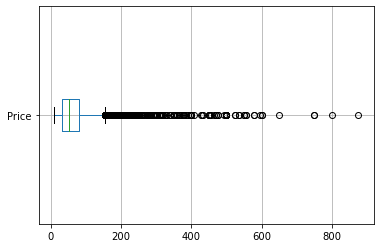

In [8]:
import matplotlib.pyplot as plt

dataDepurada.boxplot(column = 'Price', vert=False)
plt.show()

In [9]:
dataDepurada['Price'].describe()

count    10559.00000
mean        66.18515
std         56.16416
min          9.00000
25%         31.00000
50%         53.00000
75%         80.00000
max        875.00000
Name: Price, dtype: float64

In [10]:
totalRegistros = len(dataDepurada)
PreciosEliminar = len(dataDepurada[dataDepurada['Price'] > 160])
PreciosNulos = dataDepurada['Price'].isnull().sum()
Precios0 = len(dataDepurada[dataDepurada['Price'] == 0])

print('Total Registros: ',totalRegistros)
print('Precio mayor a 160: ',PreciosEliminar)
print('Precio Nulos: ',PreciosNulos)
print('Precio 0: ',Precios0)

Total Registros:  10567
Precio mayor a 160:  461
Precio Nulos:  8
Precio 0:  0


Se **Eliminan nulos y Outliers**

In [11]:
dataDepurada = dataDepurada[dataDepurada['Price'] <= 160]

Se valida la **distribución de los precios** despues de quitar Outliers

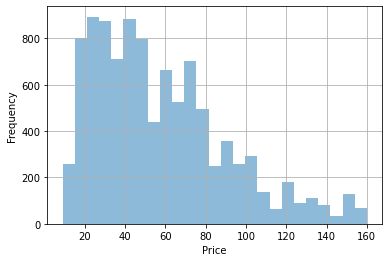

In [12]:
dataDepurada['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')
plt.show()

Se valida en cuales variables el porcentaje valores **nulos superior el 25%**

In [13]:
PorcentajeNulos = (round((len(dataDepurada) - dataDepurada.count())/len(dataDepurada)*100,2)).to_frame(name='PorcentajeNulos')
PorcentajeNulos[PorcentajeNulos['PorcentajeNulos'] > 25 ].sort_values('PorcentajeNulos', ascending=False)

,PorcentajeNulos
Host Acceptance Rate,100.00
Square Feet,96.11
Monthly Price,74.48
Weekly Price,73.46
Security Deposit,57.48
Cleaning Fee,41.06


In [14]:
print('Security Deposit con valor 0:',len(dataDepurada[dataDepurada['Security Deposit'] == 0]))
print('Cleaning Fee con valor 0:',len(dataDepurada[dataDepurada['Cleaning Fee'] == 0]))

Security Deposit con valor 0: 0
Cleaning Fee con valor 0: 0


Se **eliminan** las variables con porcentaje **valores nulos superior el 25%**, y para las variables Security Deposit y Cleaning Fee se asume que los campos en nulo representan 0 debido aque no existe valor 0 para estos campos.

In [15]:
dataDepurada['Security Deposit'] = dataDepurada['Security Deposit'].fillna(0)
dataDepurada['Cleaning Fee'] = dataDepurada['Cleaning Fee'].fillna(0)

In [16]:
colmnas_x_borrar = ['Host Acceptance Rate', 'Square Feet','Monthly Price','Weekly Price']

dataDepurada = dataDepurada.drop(colmnas_x_borrar, axis=1)
dataDepurada.head(5)

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,none,2015-04-13,within a few hours,100.0,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,0.0,25.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,0.50
1,none,2016-07-22,within an hour,100.0,Centro,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,0.0,15.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,2.43
2,none,2016-07-17,within an hour,100.0,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,0.0,5.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
3,none,2014-05-08,within a few hours,100.0,Centro,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,0.0,0.0,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN
4,none,2012-02-06,within an hour,100.0,Chamberí,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,0.0,0.0,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.08


Se valida en cuales variables el numero de **valores que puede tomar es 2 o menos**

In [17]:
VariablesUnicas = dataDepurada.apply(lambda x: len(x.unique())).to_frame(name='Variables')
VariablesUnicas[VariablesUnicas['Variables'] <= 2].sort_values('Variables')

,Variables
Experiences Offered,1


Se **elimina la variable "Experiences Offered"** porque solo registra valor "none"

In [18]:
colmnas_x_borrar = ['Experiences Offered']

dataDepurada = dataDepurada.drop(colmnas_x_borrar, axis=1)
dataDepurada.head(5)

,Host Since,Host Response Time,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,2015-04-13,within a few hours,100.0,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,0.0,25.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,0.50
1,2016-07-22,within an hour,100.0,Centro,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,0.0,15.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,2.43
2,2016-07-17,within an hour,100.0,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,0.0,5.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
3,2014-05-08,within a few hours,100.0,Centro,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,0.0,0.0,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN
4,2012-02-06,within an hour,100.0,Chamberí,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,0.0,0.0,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.08


Se valida **nulos en variable Host Since**

In [19]:
dataDepurada['Host Since'].isnull().sum()

3

Al no ser una muetsra reprentativa, se **eliminan los registros con Host Since nulos**

In [20]:
dataDepurada = dataDepurada.dropna(subset=['Host Since'])

A partir de la variable **Host Since** Se calcula el numero de años que ha sido Host hasta el año más reciente en la muestra de datos

In [21]:
from datetime import datetime

dataDepurada['Host Since'] = dataDepurada['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))

maxyear = max(dataDepurada['Host Since'].apply(lambda x: x.year))

dataDepurada['Time Host'] = dataDepurada['Host Since'].apply(lambda x: maxyear - x.year)

Se elimina la variable **Host Since**

In [22]:
dataDepurada = dataDepurada.drop(['Host Since'], axis=1)
dataDepurada.head(5)

,Host Response Time,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Time Host
0,within a few hours,100.0,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,0.0,25.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,0.50,2
1,within an hour,100.0,Centro,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,0.0,15.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,2.43,1
2,within an hour,100.0,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,0.0,5.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,1
3,within a few hours,100.0,Centro,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,0.0,0.0,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,3
4,within an hour,100.0,Chamberí,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,0.0,0.0,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.08,5


Se procede a evaluar las correlaciones entre las diferente variables para identificar posibles atributos que estén altamente correlacionados

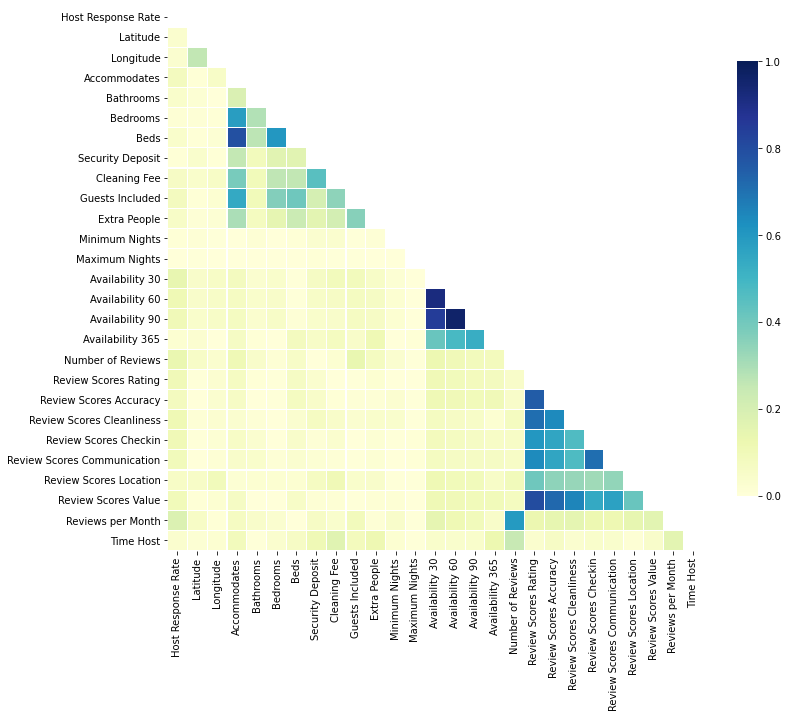

In [23]:
import numpy as np
import seaborn as sns

corr = np.abs(dataDepurada.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

Se evidencia una fuerte correlación entre:
* Beds y bedrooms con Acommodates, por lo que se retira la variable Acommodates.
* Los diferentes tipos de Availability excepto la Availability 365, por lo que se rertiran todas menos esta ultima.
* Las diferentes tipos de Scores Reviews, debido a que el Review Scores Rating Tiene fuerte correlación con los demas Score se deja esa variable y la Review Scores Location, esta ultima se deja por no tener tanta correlación con Review Scores Rating como las demas.

En el caso de Reviews per Month si bien la relación con Number of Reviews no es completamente fuerte, diera la impresion que la variable Reviews per Month podria lleggar a ser bien descrita por Number of Review.    

In [24]:
dataDepurada = dataDepurada.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90',  
                                  'Review Scores Accuracy', 'Review Scores Checkin','Review Scores Communication', 
                                  'Review Scores Cleanliness', 'Review Scores Value', 'Reviews per Month'], axis=1)

Se genera nuevamente la grafica de la matriz de correlación para verificar que haya quedado correcto el proceso de borrado

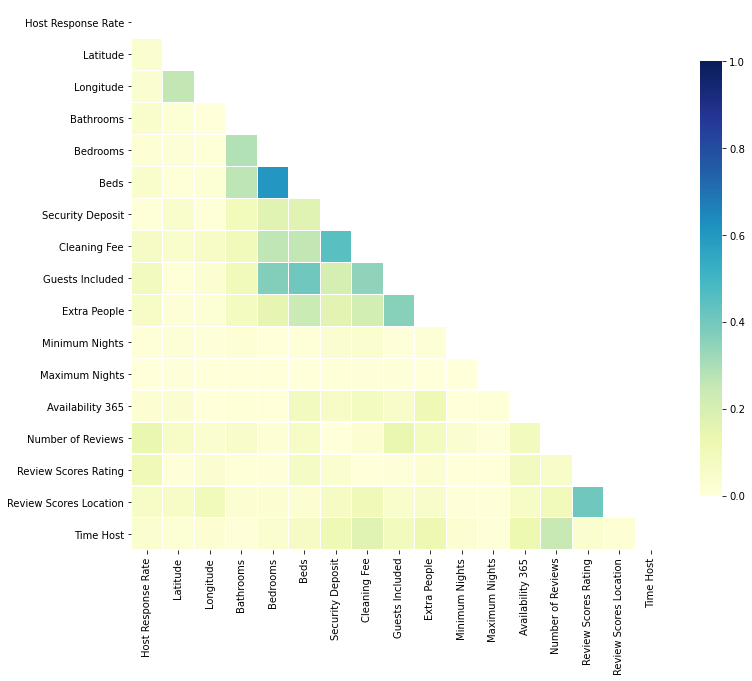

In [25]:
corr = np.abs(dataDepurada.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

In [26]:
print('Total registros: ',len(dataDepurada))
dataDepurada.head()

Total registros:  10095


,Host Response Time,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Time Host
0,within a few hours,100.0,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,60.0,0.0,25.0,1,0,2,1125,117,12,95.0,10.0,moderate,2
1,within an hour,100.0,Centro,40.415802,-3.705340,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,50.0,0.0,15.0,1,0,1,1125,208,20,91.0,10.0,flexible,1
2,within an hour,100.0,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1.5,1.0,8.0,Real Bed,10.0,0.0,5.0,1,0,3,30,140,0,NaN,NaN,moderate,1
3,within a few hours,100.0,Centro,40.412814,-3.703052,Apartment,Private room,3.0,1.0,1.0,Real Bed,30.0,0.0,0.0,1,0,10,1125,311,0,NaN,NaN,strict,3
4,within an hour,100.0,Chamberí,40.438631,-3.713716,Apartment,Private room,1.0,1.0,1.0,Real Bed,32.0,0.0,0.0,1,10,1,1125,337,97,92.0,9.0,strict,5


## Codificación de variables categóricas

Se identifican las **variables categoricas restantes**

In [27]:
dfCategoricas = dataDepurada[list(dataDepurada.select_dtypes(include=['object']).columns)]
dfCategoricas.head(5)

,Host Response Time,Neighbourhood Group Cleansed,Property Type,Room Type,Bed Type,Cancellation Policy
0,within a few hours,Retiro,Apartment,Entire home/apt,Real Bed,moderate
1,within an hour,Centro,Apartment,Entire home/apt,Real Bed,flexible
2,within an hour,Carabanchel,Apartment,Shared room,Real Bed,moderate
3,within a few hours,Centro,Apartment,Private room,Real Bed,strict
4,within an hour,Chamberí,Apartment,Private room,Real Bed,strict


Se valivadan **valores nulos** en las **variables categoricas**

In [28]:
len(dfCategoricas) - dfCategoricas.count()

Host Response Time              1252
Neighbourhood Group Cleansed       0
Property Type                      0
Room Type                          0
Bed Type                           0
Cancellation Policy                0
dtype: int64

Se valivadan **valores unicos** en las **variables categoricas**

In [29]:
dfCategoricas.apply(lambda x: len(x.unique()))

Host Response Time               5
Neighbourhood Group Cleansed    21
Property Type                   20
Room Type                        3
Bed Type                         5
Cancellation Policy              5
dtype: int64

Como los registros nulos de la variable **"Host Response Time"** representan el 12% del total de los datos, **se decide eliminar la variable**.

In [30]:
dataDepurada = dataDepurada.drop(['Host Response Time'], axis=1)
dataDepurada.head(5)

,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Time Host
0,100.0,Retiro,40.407732,-3.684819,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,60.0,0.0,25.0,1,0,2,1125,117,12,95.0,10.0,moderate,2
1,100.0,Centro,40.415802,-3.705340,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,50.0,0.0,15.0,1,0,1,1125,208,20,91.0,10.0,flexible,1
2,100.0,Carabanchel,40.389048,-3.740374,Apartment,Shared room,1.5,1.0,8.0,Real Bed,10.0,0.0,5.0,1,0,3,30,140,0,NaN,NaN,moderate,1
3,100.0,Centro,40.412814,-3.703052,Apartment,Private room,3.0,1.0,1.0,Real Bed,30.0,0.0,0.0,1,0,10,1125,311,0,NaN,NaN,strict,3
4,100.0,Chamberí,40.438631,-3.713716,Apartment,Private room,1.0,1.0,1.0,Real Bed,32.0,0.0,0.0,1,10,1,1125,337,97,92.0,9.0,strict,5


Se **codifican las variables Categricas**

In [31]:
dataCodificada = dataDepurada.copy()

variables = ['Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy']

#Diccionario con los identificadores de las variables categoricas
mean_map = {}

for variable in variables:
    mean = dataCodificada.groupby(variable)['Price'].mean()
    dataCodificada[variable] = dataCodificada[variable].map(mean)    
    mean_map[variable] = mean

dataCodificada.head()

,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Time Host
0,100.0,59.479412,40.407732,-3.684819,59.204003,75.867221,1.0,1.0,2.0,57.697415,60.0,0.0,25.0,1,0,2,1125,117,12,95.0,10.0,58.368010,2
1,100.0,64.619849,40.415802,-3.705340,59.204003,75.867221,1.0,1.0,2.0,57.697415,50.0,0.0,15.0,1,0,1,1125,208,20,91.0,10.0,50.570130,1
2,100.0,35.726950,40.389048,-3.740374,59.204003,22.683099,1.5,1.0,8.0,57.697415,10.0,0.0,5.0,1,0,3,30,140,0,NaN,NaN,58.368010,1
3,100.0,64.619849,40.412814,-3.703052,59.204003,32.225099,3.0,1.0,1.0,57.697415,30.0,0.0,0.0,1,0,10,1125,311,0,NaN,NaN,63.104526,3
4,100.0,59.549296,40.438631,-3.713716,59.204003,32.225099,1.0,1.0,1.0,57.697415,32.0,0.0,0.0,1,10,1,1125,337,97,92.0,9.0,63.104526,5


Se identifican variables con **campos Nulos**

In [32]:
dataCodificada.isnull().any()

Host Response Rate               True
Neighbourhood Group Cleansed    False
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Bathrooms                        True
Bedrooms                         True
Beds                             True
Bed Type                        False
Price                           False
Security Deposit                False
Cleaning Fee                    False
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability 365                False
Number of Reviews               False
Review Scores Rating             True
Review Scores Location           True
Cancellation Policy             False
Time Host                       False
dtype: bool

**Se completan los campos en Nulo** con el promedio de cada variable 

In [33]:
dataCodificada = dataCodificada.fillna(dataCodificada.mean())
dataCodificada.head(5)

,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Time Host
0,100.0,59.479412,40.407732,-3.684819,59.204003,75.867221,1.0,1.0,2.0,57.697415,60.0,0.0,25.0,1,0,2,1125,117,12,95.000000,10.000000,58.368010,2
1,100.0,64.619849,40.415802,-3.705340,59.204003,75.867221,1.0,1.0,2.0,57.697415,50.0,0.0,15.0,1,0,1,1125,208,20,91.000000,10.000000,50.570130,1
2,100.0,35.726950,40.389048,-3.740374,59.204003,22.683099,1.5,1.0,8.0,57.697415,10.0,0.0,5.0,1,0,3,30,140,0,91.537815,9.538742,58.368010,1
3,100.0,64.619849,40.412814,-3.703052,59.204003,32.225099,3.0,1.0,1.0,57.697415,30.0,0.0,0.0,1,0,10,1125,311,0,91.537815,9.538742,63.104526,3
4,100.0,59.549296,40.438631,-3.713716,59.204003,32.225099,1.0,1.0,1.0,57.697415,32.0,0.0,0.0,1,10,1,1125,337,97,92.000000,9.000000,63.104526,5


## Construcción y evaluación del modelo

Se deja la variable **Price de primeras** en el Dataframe

In [34]:
dataCodificada = dataCodificada[['Price', 'Host Response Rate', 'Neighbourhood Group Cleansed', 'Latitude', 'Longitude',
                                 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
                                 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
                                 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Location',
                                'Cancellation Policy', 'Time Host']]
dataCodificada.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10095.0,57.584448,32.643556,9.000000,30.000000,50.000000,76.000000,160.000000
Host Response Rate,10095.0,94.908854,14.049773,0.000000,94.908854,100.000000,100.000000,100.000000
Neighbourhood Group Cleansed,10095.0,57.584448,10.326523,31.615385,49.702857,64.619849,64.619849,64.619849
Latitude,10095.0,40.420267,0.019956,40.332908,40.409861,40.418133,40.427597,40.514247
Longitude,10095.0,-3.697132,0.023434,-3.835498,-3.707797,-3.701644,-3.693988,-3.575142
Property Type,10095.0,57.584448,5.454790,17.000000,59.204003,59.204003,59.204003,145.000000
Room Type,10095.0,57.584448,21.698486,22.683099,32.225099,75.867221,75.867221,75.867221
Bathrooms,10095.0,1.212752,0.545562,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10095.0,1.223380,0.722708,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,10095.0,1.877945,1.333750,1.000000,1.000000,1.000000,2.000000,16.000000


**División en X e Y**

In [35]:
from sklearn import preprocessing

data = dataCodificada.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = dataCodificada.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Se utiliza la capacidad de **Lasso para selecionar las variables**

best mean cross-validation score: -417.647
best parameters: {'alpha': 0.1}


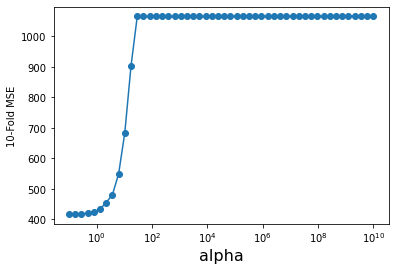

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }

grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1 * np.array(grid.cv_results_['mean_test_score'])

plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Se cargan los **datos de Test**

In [37]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Se aplican **los mismos procesos** que a los **datos de Training**

In [38]:
dfSpain = df_test[df_test['Country'] == 'Spain']

dfMadrid = dfSpain[dfSpain['City'] == 'Madrid']


colmnas_x_borrar = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name','Summary','Space','Description', 
                    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
                    'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host About',
                    'Host Thumbnail Url', 'Host Picture Url', 'Host Location', 'Host Neighbourhood', 'Host Listings Count', 
                    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed',
                    'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 
                    'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'Amenities', 'License',
                    'Jurisdiction Names', 'Calculated host listings count', 'Geolocation','Features']

dataDepurada = dfMadrid.drop(colmnas_x_borrar, axis=1)

dataDepurada = dataDepurada[dataDepurada['Price'] <= 160]

dataDepurada['Security Deposit'] = dataDepurada['Security Deposit'].fillna(0)
dataDepurada['Cleaning Fee'] = dataDepurada['Cleaning Fee'].fillna(0)

colmnas_x_borrar = ['Host Acceptance Rate', 'Square Feet','Monthly Price','Weekly Price']

dataDepurada = dataDepurada.drop(colmnas_x_borrar, axis=1)

colmnas_x_borrar = ['Experiences Offered']

dataDepurada = dataDepurada.drop(colmnas_x_borrar, axis=1)

dataDepurada = dataDepurada.dropna(subset=['Host Since'])

dataDepurada['Host Since'] = dataDepurada['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))

maxyear = max(dataDepurada['Host Since'].apply(lambda x: x.year))

dataDepurada['Time Host'] = dataDepurada['Host Since'].apply(lambda x: maxyear - x.year)

dataDepurada = dataDepurada.drop(['Host Since'], axis=1)

dataDepurada = dataDepurada.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90',  
                                  'Review Scores Accuracy', 'Review Scores Checkin','Review Scores Communication', 
                                  'Review Scores Cleanliness', 'Review Scores Value', 'Reviews per Month'], axis=1)

dataDepurada = dataDepurada.drop(['Host Response Time'], axis=1)

variables = ['Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy']

for variable in variables:
    dataDepurada[variable] = dataDepurada[variable].map(mean_map[variable])

dataDepurada = dataDepurada.fillna(dataDepurada.mean())

dataDepurada.head(5)

,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Time Host
0,100.000000,31.965517,40.346320,-3.691440,59.204003,32.225099,1.0,1.0,1.0,57.697415,15.0,0.0,5.0,1,0,1,1125,46,11,100.000000,9.000000,50.570130,1
1,100.000000,64.619849,40.414423,-3.712847,59.204003,32.225099,1.0,1.0,1.0,54.560440,25.0,175.0,20.0,1,0,3,1125,310,17,96.000000,10.000000,58.368010,2
2,80.000000,59.549296,40.437012,-3.698987,59.204003,75.867221,1.0,1.0,1.0,57.697415,45.0,150.0,20.0,1,25,1,1125,120,0,91.678429,9.523169,63.104526,5
3,95.015034,33.650685,40.407932,-3.744533,59.204003,32.225099,1.0,1.0,1.0,57.697415,25.0,0.0,0.0,1,0,1,1125,363,1,100.000000,10.000000,58.368010,2
4,95.015034,64.619849,40.410107,-3.704869,59.204003,75.867221,1.0,0.0,2.0,57.697415,40.0,0.0,0.0,1,0,1,1125,0,0,91.678429,9.523169,50.570130,2


In [39]:
dataDepurada = dataDepurada[['Price', 'Host Response Rate', 'Neighbourhood Group Cleansed', 'Latitude', 'Longitude',
                                 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
                                 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
                                 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Location',
                                'Cancellation Policy', 'Time Host']]
dataDepurada.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2525.0,56.576634,32.435578,9.000000,30.000000,50.000000,75.000000,160.000000
Host Response Rate,2525.0,95.015034,13.707010,0.000000,95.015034,100.000000,100.000000,100.000000
Neighbourhood Group Cleansed,2525.0,57.325458,10.495678,31.615385,49.702857,64.619849,64.619849,64.619849
Latitude,2525.0,40.420954,0.021224,40.331888,40.409767,40.419071,40.428352,40.513673
Longitude,2525.0,-3.697273,0.023796,-3.785982,-3.707852,-3.701616,-3.693607,-3.573613
Property Type,2525.0,57.393391,5.448084,20.500000,59.204003,59.204003,59.204003,68.000000
Room Type,2525.0,57.379895,21.773285,22.683099,32.225099,75.867221,75.867221,75.867221
Bathrooms,2525.0,1.195747,0.506434,0.000000,1.000000,1.000000,1.000000,6.000000
Bedrooms,2525.0,1.225397,0.685477,0.000000,1.000000,1.000000,1.000000,6.000000
Beds,2525.0,1.851970,1.272489,1.000000,1.000000,1.000000,2.000000,16.000000


**Evaluacion del modelo**

In [40]:
data_test = dataDepurada.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [41]:
feature_names

Index(['Host Response Rate', 'Neighbourhood Group Cleansed', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Location', 'Cancellation Policy', 'Time Host'],
      dtype='object')

In [42]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test): %0.5g' % mseTestModelLasso)
print('RMSE Modelo Lasso (train): %0.5g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.5g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 415.51
MSE Modelo Lasso (test): 408.35
RMSE Modelo Lasso (train): 20.384
RMSE Modelo Lasso (test) : 20.208
Host Response Rate -0.9904155510520749
Neighbourhood Group Cleansed 5.3206613385244275
Latitude 0.40980657562081624
Longitude 0.21638209519481308
Property Type -0.21079927967140444
Room Type 15.797618716870119
Bathrooms 1.7197004874290502
Bedrooms 6.279733945024661
Beds 2.0174628928075986
Bed Type 0.4112863577662248
Security Deposit 1.336403928978314
Cleaning Fee 4.092423288086688
Guests Included 3.0028050213936752
Extra People -0.653085598517427
Minimum Nights -0.501068451791911
Maximum Nights -0.0
Availability 365 2.1811653728007583
Number of Reviews -2.8995350633449832
Review Scores Rating 2.093132954085847
Review Scores Location 0.8868559201662379
Cancellation Policy -0.8332618834767578
Time Host 0.6168066997276636


Al evaluar el modelo se logra identificar:

* No se existe overfitting, el error cuadrático medio se mantiene similar entre los datos de prueba y los datos de entrenamiento. 

* El error cuadrático Medio es alto si se considera que podría representar un 35% del precio media.


* Los factores que más influyen en el incremento del precio son el número de habitaciones, el barrio y el tipo de habitación, siendo este último en comparación a los otros dos el que genera casi el triple de efecto en el precio final.


* El factor que más efecto en la reducción del precio genera es el número de reseñas, lo que permite pensar que los hospedadores menos comentados buscan hacerse notar con precios más bajos 


* El máximo número de noches parece ser un factor que no aporte para nada al comportamiento precio.


* Para mejorar el resultado del modelo, se podrían retirar variables como la política de cancelación, el número mínimo de noches, las personas extra,  el tipo de cama, el tipo de propiedad, la longitud y la latitud.